# Data read in
## load project area

In [5]:
import pandas as pd
import json

In [2]:
proj_json_str = open("../data/reconnect_subscribers/reconnect_project_areas_20230309.json", "r").read()
proj_json = json.loads(proj_json_str)
proj_df = pd.DataFrame.from_dict(proj_json)
proj_df

,Project ID,geometry
0,AL1701-A59,"{'type': 'MultiPolygon', 'coordinates': [[[[-8..."
1,GA1703-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-8..."
2,IA1701-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-9..."
3,IA1705-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-9..."
4,MO1701-A60,"{'type': 'MultiPolygon', 'coordinates': [[[[-9..."
5,MT1703-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-1..."
6,ND1702-A59,"{'type': 'MultiPolygon', 'coordinates': [[[[-9..."
7,TN1706-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-8..."


In [3]:
from shapely.geometry import shape

proj_df['geo_object'] = proj_df.apply(lambda row: shape(row['geometry']), axis=1)
proj_df

,Project ID,geometry,geo_object
0,AL1701-A59,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","MULTIPOLYGON (((-88.1159 34.6605, -88.1158 34...."
1,GA1703-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","MULTIPOLYGON (((-81.3757 31.405, -81.3757 31.4..."
2,IA1701-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","MULTIPOLYGON (((-96.3818 42.9034, -96.3826 42...."
3,IA1705-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","MULTIPOLYGON (((-95.0145 42.0355, -95.0051 42...."
4,MO1701-A60,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","MULTIPOLYGON (((-93.5615 40.0758, -93.5622 40...."
5,MT1703-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...","MULTIPOLYGON (((-113.0077 45.1484, -113.0077 4..."
6,ND1702-A59,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","MULTIPOLYGON (((-97.6191 47.6721, -97.6026 47...."
7,TN1706-A61,"{'type': 'MultiPolygon', 'coordinates': [[[[-8...","MULTIPOLYGON (((-86.019 36.3215, -86.0246 36.3..."


In [4]:
type(proj_df.geo_object[0])

shapely.geometry.multipolygon.MultiPolygon

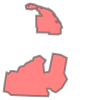

In [5]:
proj_df.geo_object[0]

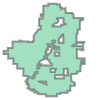

In [6]:
proj_df.geo_object[2]

## read reConnect subscribers and BlackKnight data

In [6]:
subscr_df = pd.read_excel("../data/reconnect_subscribers/ReConnect_Project_Construction_Status.xlsx", sheet_name="Geocoded Subscribers")
subscr_df

,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,Price,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
0,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,2330 WHITE PIKE,CHEROKEE,AL,35616.0,34.62374301376934,-88.02511502431014,NaN
1,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,79.95,...,Mbps,940.0,Mbps,2505 WHITE PKE APT B,CHEROKEE,AL,35616.0,34.62462801701605,-88.0251479651896,NaN
2,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,4760 MAUD RD,CHEROKEE,AL,35616.0,34.62745200592434,-88.0688040182315,NaN
3,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,4630 MAUD RD,CHEROKEE,AL,35616.0,34.62828399363366,-88.07018200311353,NaN
4,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,79.95,...,Mbps,940.0,Mbps,4625 MAUD RD,CHEROKEE,AL,35616.0,34.629362996029386,-88.07024998034831,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.1890649,-86.24551002,NaN
4132,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.19754708,-86.24230636,NaN
4133,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.20302368,-86.23578665,NaN
4134,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.20146784,-86.24775582,NaN


In [8]:
subscr_df.columns

Index(['Entity Name', 'Program', 'Project ID', 'R&C Report: Report Name',
       'Report Name', 'Period Start Date', 'Period End Date', 'Report Status',
       'Subscriber Type', 'Price', 'Offering Type', 'Download Speed',
       'Download Speed Type', 'Upload Speed', 'Upload Speed Type', 'Address',
       'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Notes'],
      dtype='object')

In [7]:
bk_df = pd.read_csv("../data/BLACKKNIGHT_ANALYSIS_SUBSET.csv", low_memory=False, index_col=0)
bk_df

,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,property_zip4,...,raw_mailing_zip4,edition,owner1_first_name,owner1_middle_name,owner1_last_name,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,dpid
1,19193,16584,884705119003,NaN,C,1810 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,14,LINDA,KAY,RIESENBERG,NaN,NaN,NaN,3,191930016537
2,19193,16585,884705119004,NaN,C,1814 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,14,NATHAN M,NaN,BROCKHAUS,NaN,NaN,NaN,1,191930016538
3,19193,16586,884705119005,NaN,C,1818 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,14,JARED,NaN,RAYMER,JOHN,NaN,RAYMER,1,191930016539
4,19193,16587,884705119006,NaN,NaN,1822 S LAKEPORT ST,SIOUX CITY,IA,51106.0,4908.0,...,NaN,14,SOFIA,NaN,TARELO,ROBERTO,SOFIA,TARELO-GALLEGOS,3,191930016540
5,19193,16555,884705117021,NaN,C,1915 S CLINTON ST,SIOUX CITY,IA,51106.0,2515.0,...,NaN,14,DAWN,A,LADE,NaN,NaN,NaN,3,191930016505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516268,19193,15821,884629426018,NaN,NaN,14 W 1ST ST,BRONSON,IA,51007.0,7722.0,...,NaN,14,JAMES,D,AMICK,KRISTIE,L,AMICK,3,191930015788
516269,19193,15822,884629427001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14,NaN,NaN,HAAFKE CHARLES & PEGGY TRUST,NaN,NaN,NaN,3,191930015789
516270,19193,15823,884629427003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14,NaN,NaN,HAAFKE CHARLES & PEGGY TRUST,NaN,NaN,NaN,3,191930015790
516271,19193,15824,884629428002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142.0,14,NaN,NaN,CITY OF BRONSON,NaN,NaN,NaN,3,191930015791


In [1]:
import math
def hav_dist(lat1_degree, long1_degree, lat2_degree, long2_degree):
    '''
    apply Haversine formula to calculate great-circile distance
    between 2 coordinates, return value in miles
    '''
    
    avg_radius = 6371    # from wikipedia on Earth Radius
    
    lat1 = math.radians(lat1_degree)
    lat2 = math.radians(lat2_degree)
    long1 = math.radians(long1_degree)
    long2 = math.radians(long2_degree)
    dist_km = 2 * avg_radius * math.asin(math.sqrt( 
        math.sin((lat2-lat1)/2)**2 + 
        math.cos(lat1)*math.cos(lat2)*math.sin((long2-long1)/2)**2 ))
    return dist_km * 0.621371

In [2]:
hav_dist(28.426846, 77.088834, 28.394231, 77.050308)

3.2495874716773274

## explore fastest way to find the nearest property in BK data

Ignore the following cells when implementing - they are for experimental trialsonly.

The most intuitive method of looping the built in zipped lists is fastest as it skips .loc using column name.

In [69]:
import time
def find_nearest_pdapply(lat, long):
    dist_vector = bk_df.apply(lambda row: hav_dist(row["property_address_latitiude"], row["property_address_longitude"], lat, long), axis=1)
    return dist_vector

start = time.time()
find_nearest_pdapply(42.448600, -96.326900)
print(time.time() - start)

6.451140403747559


In [70]:
import dask.dataframe as dd
bk_ddf = dd.from_pandas(bk_df, npartitions=40)

def find_nearest_ddapply(lat, long):
    dist_vector = bk_ddf.apply(lambda row: hav_dist(row["property_address_latitiude"], row["property_address_longitude"], lat, long), axis=1, meta=(None, "float64"))
    return dist_vector.compute()

start = time.time()
find_nearest_ddapply(42.448600, -96.326900)
print(time.time() - start)

6.152803659439087


In [72]:
def find_nearest_ziplist(lat, long):
    dist = [None] * bk_df.shape[0]
    counter = 0
    for plat, plong in zip(bk_df.property_address_latitiude, bk_df.property_address_longitude):
        dist[counter] = hav_dist(lat, long, plat, plong)
        counter += 1
    return pd.Series(dist)

In [73]:
start = time.time()
find_nearest_ziplist(42.448600, -96.326900)
print(time.time() - start)

0.6062197685241699


Moving forward, plan is to use the zipped list method as the de-facto implementation to find the nearest property

# Match subscribers to properties

## find closest geocoded property

In [15]:
def find_nearest(lat, long):
    counter = 0
    min_dist = 2**31
    min_property_index = 0
    for plat, plong in zip(bk_df.property_address_latitiude, bk_df.property_address_longitude):
        dist = hav_dist(lat, long, plat, plong)
        if dist < min_dist:
            min_property_index = counter
            min_dist = dist
        counter += 1
    return (min_dist, min_property_index)

In [8]:
test_state_list = list(bk_df.property_state.dropna().unique())
subscr_test_df = subscr_df[subscr_df.State.isin(test_state_list)]

In [17]:
subscr_test_df

,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,Price,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
818,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,49.95,...,Mbps,2.0,Mbps,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
819,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
820,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,3.0,Mbps,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160,NaN
821,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
822,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,2.0,Mbps,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,122.46,...,Mbps,50.0,Mbps,19665 441ST AVE,ERWIN,SD,57233.0,44.531689,-97.395029,NaN
3843,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Business,74.98,...,Mbps,50.0,Mbps,19665B 441ST AVE,ERWIN,SD,57233.0,44.5318,-97.395029,NaN
3844,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,49.99,...,Mbps,50.0,Mbps,19618 450TH AVE,LAKE NORDEN,SD,57248.0,44.540637,-97.207042,NaN
3845,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,156.21,...,Mbps,50.0,Mbps,43318 196TH ST,DE SMET,SD,57231.0,44.543843,-97.548263,NaN


In [127]:
from tqdm import tqdm
tqdm.pandas()

min_dists = subscr_test_df.progress_apply(lambda row: find_nearest(float(row["Latitude"]), float(row["Longitude"])), axis=1)

min_dists = pd.DataFrame(list(min_dists), columns=("distance", "nearest_property_index"))

100%|██████████| 2107/2107 [18:11<00:00,  1.93it/s]


In [136]:
len(min_dists["closest asset index"].unique())

923

In [147]:
subscr_test_df

,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,Price,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
818,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,49.95,...,Mbps,2.0,Mbps,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
819,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
820,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,3.0,Mbps,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160,NaN
821,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
822,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,2.0,Mbps,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,122.46,...,Mbps,50.0,Mbps,19665 441ST AVE,ERWIN,SD,57233.0,44.531689,-97.395029,NaN
3843,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Business,74.98,...,Mbps,50.0,Mbps,19665B 441ST AVE,ERWIN,SD,57233.0,44.5318,-97.395029,NaN
3844,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,49.99,...,Mbps,50.0,Mbps,19618 450TH AVE,LAKE NORDEN,SD,57248.0,44.540637,-97.207042,NaN
3845,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,156.21,...,Mbps,50.0,Mbps,43318 196TH ST,DE SMET,SD,57231.0,44.543843,-97.548263,NaN


In [160]:
min_dists["subscriber_index"] = pd.Series()
for i in range(min_dists.shape[0]):
    min_dists.loc[i, "subscriber_index"] = list(subscr_test_df.index)[i]

min_dists

,distance,nearest_property_index,subscriber_index
0,0.029447,19121,818
1,0.029447,19121,819
2,0.081828,18747,820
3,0.081828,18747,821
4,0.081828,18747,822
...,...,...,...
2102,64.525450,385339,3842
2103,64.532498,385339,3843
2104,62.071754,385339,3844
2105,68.598546,385339,3845


In [154]:
min_dists.to_csv("matched_nearest_sample.csv", index=False)

In [172]:
min_dists_subscr_df = subscr_df.loc[list(min_dists.subscriber_index),].reset_index()
min_dists_subscr_df

,index,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
0,818,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,...,Mbps,2.0,Mbps,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
1,819,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,...,Mbps,10.0,Mbps,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
2,820,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,...,Mbps,3.0,Mbps,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160,NaN
3,821,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,...,Mbps,10.0,Mbps,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
4,822,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,...,Mbps,2.0,Mbps,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,3842,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,...,Mbps,50.0,Mbps,19665 441ST AVE,ERWIN,SD,57233.0,44.531689,-97.395029,NaN
2103,3843,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Business,...,Mbps,50.0,Mbps,19665B 441ST AVE,ERWIN,SD,57233.0,44.5318,-97.395029,NaN
2104,3844,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,...,Mbps,50.0,Mbps,19618 450TH AVE,LAKE NORDEN,SD,57248.0,44.540637,-97.207042,NaN
2105,3845,"Valley Telecommunications Cooperative Assoc., Inc",ReConnect,SD1701-A61,RPT-0643,Construction Progress Report,1/1/2021,12/31/2021,Pending Certification,Farm,...,Mbps,50.0,Mbps,43318 196TH ST,DE SMET,SD,57231.0,44.543843,-97.548263,NaN


In [173]:
min_dists_property_df = bk_df.loc[list(min_dists.nearest_property_index)].reset_index()
min_dists_property_df

,index,fips_code,pid,apn,duplicateapn,property_address_source_flag,property_full_street_address,property_city_name,property_state,property_zip_code,...,raw_mailing_zip4,edition,owner1_first_name,owner1_middle_name,owner1_last_name,owner2_firstname,owner2_middle_name,owner2_last_name,parsed_owner_source_code,dpid
0,19121,19149,50374,16-11-300-007,NaN,NaN,NaN,NaN,NaN,51062.0,...,NaN,15,NaN,NaN,"ZEMANEK, JEAN E REVOCABLE LIVING TRUST",NaN,NaN,NaN,3,191490028157
1,19121,19149,50374,16-11-300-007,NaN,NaN,NaN,NaN,NaN,51062.0,...,NaN,15,NaN,NaN,"ZEMANEK, JEAN E REVOCABLE LIVING TRUST",NaN,NaN,NaN,3,191490028157
2,18747,19149,50318,16-09-100-001,NaN,P,23176 CONCORD AVE,WESTFIELD,IA,51062.0,...,NaN,15,MARK,NaN,RAPAICH,ELISA,NaN,ZAPPACOSTA,3,191490016629
3,18747,19149,50318,16-09-100-001,NaN,P,23176 CONCORD AVE,WESTFIELD,IA,51062.0,...,NaN,15,MARK,NaN,RAPAICH,ELISA,NaN,ZAPPACOSTA,3,191490016629
4,18747,19149,50318,16-09-100-001,NaN,P,23176 CONCORD AVE,WESTFIELD,IA,51062.0,...,NaN,15,MARK,NaN,RAPAICH,ELISA,NaN,ZAPPACOSTA,3,191490016629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,385339,46099,4523,15526,NaN,NaN,NaN,NaN,NaN,57033.0,...,2032.0,14,RICHARD,D,LUNDIN,LOIS,A,LUNDIN,3,460990004577
2103,385339,46099,4523,15526,NaN,NaN,NaN,NaN,NaN,57033.0,...,2032.0,14,RICHARD,D,LUNDIN,LOIS,A,LUNDIN,3,460990004577
2104,385339,46099,4523,15526,NaN,NaN,NaN,NaN,NaN,57033.0,...,2032.0,14,RICHARD,D,LUNDIN,LOIS,A,LUNDIN,3,460990004577
2105,385339,46099,4523,15526,NaN,NaN,NaN,NaN,NaN,57033.0,...,2032.0,14,RICHARD,D,LUNDIN,LOIS,A,LUNDIN,3,460990004577


In [177]:
min_dists_subscr_df.columns

Index(['index', 'Entity Name', 'Program', 'Project ID',
       'R&C Report: Report Name', 'Report Name', 'Period Start Date',
       'Period End Date', 'Report Status', 'Subscriber Type', 'Price',
       'Offering Type', 'Download Speed', 'Download Speed Type',
       'Upload Speed', 'Upload Speed Type', 'Address', 'City', 'State',
       'Zipcode', 'Latitude', 'Longitude', 'Notes'],
      dtype='object')

In [188]:
list(bk_df.columns)

['fips_code',
 'pid',
 'apn',
 'duplicateapn',
 'property_address_source_flag',
 'property_full_street_address',
 'property_city_name',
 'property_state',
 'property_zip_code',
 'property_zip4',
 'property_unit_type',
 'property_unit_number',
 'property_house_number',
 'property_street_direction_left',
 'property_street_name',
 'property_street_suffix',
 'property_street_direction_right',
 'property_address_carrier_route',
 'property_address_latitiude',
 'property_address_longitude',
 'property_address_census_tract',
 'assessee_owner_name',
 '_2nd_assessee_owner_name',
 'assessee_owner_vesting_code',
 'tax_account_number',
 'mail_careof_name',
 'assessee_mail_full_street_address',
 'assessee_mail_city_name',
 'assessee_mail_state_code',
 'assessee_mail_zip_code',
 'assessee_mail_zip4',
 'assessee_mail_unit_type',
 'assessee_mail_unit_number',
 'owner_occupied',
 'assessed_land_value',
 'assessed_improvement_value',
 'total_assessed_value',
 'assessment_year',
 'california_homeowner_exe

In [191]:
merge_temp = pd.merge(left = min_dists, 
                      right = bk_df.loc[:, ['property_full_street_address', 'property_city_name','property_state', 'property_zip_code', 'property_address_latitiude', 'property_address_longitude']
                                       ].set_axis(('Address', 'City', 'State','Zipcode', 'Latitude', 'Longitude'), axis=1).add_suffix('_bkprop'),
                  left_on = "subscriber_index", right_index=True)
min_dists_merged = pd.merge(left = merge_temp, right = subscr_df.loc[:, ['Address', 'City', 'State','Zipcode', 'Latitude', 'Longitude']].add_suffix('_subscr'),
                  left_on = "subscriber_index", right_index=True)
min_dists_merged

,distance,nearest_property_index,subscriber_index,Address_bkprop,City_bkprop,State_bkprop,Zipcode_bkprop,Latitude_bkprop,Longitude_bkprop,Address_subscr,City_subscr,State_subscr,Zipcode_subscr,Latitude_subscr,Longitude_subscr
0,0.029447,19121,818,5006 MORNINGSIDE AVE,SIOUX CITY,IA,51106.0,42.469901,-96.341893,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
1,0.029447,19121,819,5008 MORNINGSIDE AVE,SIOUX CITY,IA,51106.0,42.469894,-96.341709,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
2,0.081828,18747,820,2010 S LEMON ST,SIOUX CITY,IA,51106.0,42.469592,-96.341884,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160
3,0.081828,18747,821,2014 S LEMON ST,SIOUX CITY,IA,51106.0,42.469500,-96.341884,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160
4,0.081828,18747,822,2104 S LAKEPORT ST,SIOUX CITY,IA,51106.0,42.468575,-96.346008,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,64.525450,385339,3842,2317 S SAINT AUBIN ST,SIOUX CITY,IA,51106.0,42.466516,-96.356372,19665 441ST AVE,ERWIN,SD,57233.0,44.531689,-97.395029
2103,64.532498,385339,3843,2321 S SAINT AUBIN ST,SIOUX CITY,IA,51106.0,42.466378,-96.356388,19665B 441ST AVE,ERWIN,SD,57233.0,44.5318,-97.395029
2104,62.071754,385339,3844,3800 ORLEANS AVE,SIOUX CITY,IA,51106.0,42.471170,-96.359037,19618 450TH AVE,LAKE NORDEN,SD,57248.0,44.540637,-97.207042
2105,68.598546,385339,3845,3806 ORLEANS AVE,SIOUX CITY,IA,51106.0,42.471170,-96.358883,43318 196TH ST,DE SMET,SD,57231.0,44.543843,-97.548263


In [193]:
# min_dists_merged.to_csv("matched_nearest_sample.csv", index=False)

## find property by matching street address

In [43]:
for i in list(bk_df.columns):
    print(i)

fips_code
pid
apn
duplicateapn
property_address_source_flag
property_full_street_address
property_city_name
property_state
property_zip_code
property_zip4
property_unit_type
property_unit_number
property_house_number
property_street_direction_left
property_street_name
property_street_suffix
property_street_direction_right
property_address_carrier_route
property_address_latitiude
property_address_longitude
property_address_census_tract
assessee_owner_name
_2nd_assessee_owner_name
assessee_owner_vesting_code
tax_account_number
mail_careof_name
assessee_mail_full_street_address
assessee_mail_city_name
assessee_mail_state_code
assessee_mail_zip_code
assessee_mail_zip4
assessee_mail_unit_type
assessee_mail_unit_number
owner_occupied
assessed_land_value
assessed_improvement_value
total_assessed_value
assessment_year
california_homeowner_exemption
tax_exemption_codes
tax_rate_code_area
recorder_document_number_fromasmt
recorder_book_number_fromasmt
recorder_page_number_fromasmt
recording_date

In [13]:
for i in list(subscr_df.columns):
    print(i, end=" | ")

Entity Name | Program | Project ID | R&C Report: Report Name | Report Name | Period Start Date | Period End Date | Report Status | Subscriber Type | Price | Offering Type | Download Speed | Download Speed Type | Upload Speed | Upload Speed Type | Address | City | State | Zipcode | Latitude | Longitude | Notes | 

In [14]:
subscr_df

,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,Price,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
0,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,2330 WHITE PIKE,CHEROKEE,AL,35616.0,34.62374301376934,-88.02511502431014,NaN
1,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,79.95,...,Mbps,940.0,Mbps,2505 WHITE PKE APT B,CHEROKEE,AL,35616.0,34.62462801701605,-88.0251479651896,NaN
2,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,4760 MAUD RD,CHEROKEE,AL,35616.0,34.62745200592434,-88.0688040182315,NaN
3,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,54.95,...,Mbps,250.0,Mbps,4630 MAUD RD,CHEROKEE,AL,35616.0,34.62828399363366,-88.07018200311353,NaN
4,"National Telephone of Alabama, Inc.",ReConnect,AL1701-A59,RPT-1200,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,79.95,...,Mbps,940.0,Mbps,4625 MAUD RD,CHEROKEE,AL,35616.0,34.629362996029386,-88.07024998034831,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.1890649,-86.24551002,NaN
4132,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.19754708,-86.24230636,NaN
4133,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.20302368,-86.23578665,NaN
4134,"Mon-Cre Telephone Cooperative, Incorporated",ReConnect,AL1705-A65,RPT-1954,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,267.06,...,Mbps,200.0,Mbps,NaN,NaN,NaN,NaN,32.20146784,-86.24775582,NaN


In [9]:
bk_group_by_city = bk_df.groupby(by = ["property_state", "property_city_name"])
def address_exact_match(street_address, city_name, state_name):
    try:
        bk_filtered_by_city = bk_group_by_city.get_group((state_name, city_name.upper()))
    except KeyError:
        return None
        
    for bk_dpid, bk_ad, bk_city, bk_state in zip(bk_filtered_by_city.dpid, bk_filtered_by_city.property_full_street_address, bk_filtered_by_city.property_city_name, bk_filtered_by_city.property_state):
        if isinstance(bk_ad, float):
            continue
        if street_address.lower().strip() == bk_ad.lower().strip():
            return bk_dpid
    return None

In [10]:
from tqdm import tqdm
tqdm.pandas()

exact_address_matches = subscr_test_df.progress_apply(lambda row: address_exact_match(row["Address"], row["City"], row["State"]), axis=1)

100%|██████████| 2107/2107 [00:05<00:00, 397.77it/s]


In [33]:
exact_address_matches

818     191490016465
819     191490016844
820     191490005880
821     191490016671
822     191490016673
            ...     
3842            None
3843            None
3844            None
3845            None
3846            None
Length: 2107, dtype: object

In [34]:
sum(exact_address_matches.isnull())

1430

In [11]:
address_matched_join = pd.DataFrame()
address_matched_join["index_subscr"] = exact_address_matches.dropna().index
address_matched_join["dpid_bk"] = exact_address_matches.dropna().reset_index(drop=True)
address_matched_join["match_type"] = "exact address match"
address_matched_id = address_matched_join.copy()
address_matched_id

,index_subscr,dpid_bk,match_type
0,818,191490016465,exact address match
1,819,191490016844,exact address match
2,820,191490005880,exact address match
3,821,191490016671,exact address match
4,822,191490016673,exact address match
...,...,...,...
672,3218,380990002358,exact address match
673,3219,380990002307,exact address match
674,3220,380990002299,exact address match
675,3224,380990002273,exact address match


In [12]:
address_matched_join = pd.merge(left = address_matched_join,
        right = bk_df.loc[:, ['fips_code', 'dpid', 'apn', 'property_full_street_address', 
                              'property_city_name','property_state', 'property_zip_code', 'property_address_latitiude', 'property_address_longitude']
                         ].set_axis(('fips', 'dpid', 'apn', 'address', 'city', 'state','zipcode', 'latitude', 'longitude'), axis=1).add_suffix('_bk'),
        left_on = "dpid_bk", right_on = "dpid_bk")


In [13]:
address_matched_join

,index_subscr,dpid_bk,match_type,fips_bk,apn_bk,address_bk,city_bk,state_bk,zipcode_bk,latitude_bk,longitude_bk
0,818,191490016465,exact address match,19149,15-24-400-014,25572 HIGHWAY 12,WESTFIELD,IA,51062.0,42.685234,-96.567019
1,819,191490016844,exact address match,19149,16-19-300-003,25754 HIGHWAY 12,WESTFIELD,IA,51062.0,42.684184,-96.562879
2,820,191490005880,exact address match,19149,08-35-400-005,21601 N RIDGE RD,WESTFIELD,IA,51062.0,42.742312,-96.588421
3,821,191490016671,exact address match,19149,16-11-200-001,23079 K18N,WESTFIELD,IA,51062.0,42.719780,-96.476048
4,822,191490016673,exact address match,19149,16-11-200-003,23345 K18N,WESTFIELD,IA,51062.0,42.716212,-96.476020
...,...,...,...,...,...,...,...,...,...,...,...
672,3218,380990002358,exact address match,38099,08000001970010,7590 151ST AVE NE,GRAFTON,ND,58237.0,48.512412,-97.384728
673,3219,380990002307,exact address match,38099,08000001929010,15229 76TH ST NE,GRAFTON,ND,58237.0,48.514368,-97.358834
674,3220,380990002299,exact address match,38099,08000001924010,15149 76TH ST NE,GRAFTON,ND,58237.0,48.514489,-97.374053
675,3224,380990002273,exact address match,38099,08000001901000,15207 77TH ST NE,GRAFTON,ND,58237.0,48.529037,-97.363334


In [14]:
address_matched_join = pd.merge(left = address_matched_join, 
                                right = subscr_df.loc[:, ['Address', 'City', 'State','Zipcode', 'Latitude', 'Longitude']
                                                 ].set_axis(('address', 'city', 'state','zipcode', 'latitude', 'longitude'), axis=1).add_suffix('_subscr'),
                                left_on = "index_subscr", right_index = True)

In [15]:
address_matched_join

,index_subscr,dpid_bk,match_type,fips_bk,apn_bk,address_bk,city_bk,state_bk,zipcode_bk,latitude_bk,longitude_bk,address_subscr,city_subscr,state_subscr,zipcode_subscr,latitude_subscr,longitude_subscr
0,818,191490016465,exact address match,19149,15-24-400-014,25572 HIGHWAY 12,WESTFIELD,IA,51062.0,42.685234,-96.567019,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
1,819,191490016844,exact address match,19149,16-19-300-003,25754 HIGHWAY 12,WESTFIELD,IA,51062.0,42.684184,-96.562879,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
2,820,191490005880,exact address match,19149,08-35-400-005,21601 N RIDGE RD,WESTFIELD,IA,51062.0,42.742312,-96.588421,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160
3,821,191490016671,exact address match,19149,16-11-200-001,23079 K18N,WESTFIELD,IA,51062.0,42.719780,-96.476048,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160
4,822,191490016673,exact address match,19149,16-11-200-003,23345 K18N,WESTFIELD,IA,51062.0,42.716212,-96.476020,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,3218,380990002358,exact address match,38099,08000001970010,7590 151ST AVE NE,GRAFTON,ND,58237.0,48.512412,-97.384728,7590 151st Ave NE,Grafton,ND,58237.0,48.512530,-97.384114
673,3219,380990002307,exact address match,38099,08000001929010,15229 76TH ST NE,GRAFTON,ND,58237.0,48.514368,-97.358834,15229 76th St NE,Grafton,ND,58237.0,48.513970,-97.362770
674,3220,380990002299,exact address match,38099,08000001924010,15149 76TH ST NE,GRAFTON,ND,58237.0,48.514489,-97.374053,15149 76th St NE,Grafton,ND,58237.0,48.514241,-97.374062
675,3224,380990002273,exact address match,38099,08000001901000,15207 77TH ST NE,GRAFTON,ND,58237.0,48.529037,-97.363334,15207 77th St NE,Grafton,ND,58237.0,48.528158,-97.363528


In [145]:
address_matched_join.to_csv("../data/reconnect_subscribers/exact_address_match.csv")

In [27]:
address_matched_join.latitude_subscr = pd.to_numeric(address_matched_join.latitude_subscr)
address_matched_join.longitude_subscr = pd.to_numeric(address_matched_join.longitude_subscr)

In [28]:
address_matched_join["geocoded_dist"] = address_matched_join.apply(lambda row: hav_dist(row['latitude_bk'], row['longitude_bk'], row['latitude_subscr'], row['longitude_subscr']), axis = 1)
address_matched_join

,index_subscr,dpid_bk,match_type,fips_bk,apn_bk,address_bk,city_bk,state_bk,zipcode_bk,latitude_bk,longitude_bk,address_subscr,city_subscr,state_subscr,zipcode_subscr,latitude_subscr,longitude_subscr,geocoded_dist
0,818,191490016465,exact address match,19149,15-24-400-014,25572 HIGHWAY 12,WESTFIELD,IA,51062.0,42.685234,-96.567019,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,0.356556
1,819,191490016844,exact address match,19149,16-19-300-003,25754 HIGHWAY 12,WESTFIELD,IA,51062.0,42.684184,-96.562879,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,0.564704
2,820,191490005880,exact address match,19149,08-35-400-005,21601 N RIDGE RD,WESTFIELD,IA,51062.0,42.742312,-96.588421,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160,3.677515
3,821,191490016671,exact address match,19149,16-11-200-001,23079 K18N,WESTFIELD,IA,51062.0,42.719780,-96.476048,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160,2.446422
4,822,191490016673,exact address match,19149,16-11-200-003,23345 K18N,WESTFIELD,IA,51062.0,42.716212,-96.476020,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160,2.445989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,3218,380990002358,exact address match,38099,08000001970010,7590 151ST AVE NE,GRAFTON,ND,58237.0,48.512412,-97.384728,7590 151st Ave NE,Grafton,ND,58237.0,48.512530,-97.384114,0.029262
673,3219,380990002307,exact address match,38099,08000001929010,15229 76TH ST NE,GRAFTON,ND,58237.0,48.514368,-97.358834,15229 76th St NE,Grafton,ND,58237.0,48.513970,-97.362770,0.182237
674,3220,380990002299,exact address match,38099,08000001924010,15149 76TH ST NE,GRAFTON,ND,58237.0,48.514489,-97.374053,15149 76th St NE,Grafton,ND,58237.0,48.514241,-97.374062,0.017140
675,3224,380990002273,exact address match,38099,08000001901000,15207 77TH ST NE,GRAFTON,ND,58237.0,48.529037,-97.363334,15207 77th St NE,Grafton,ND,58237.0,48.528158,-97.363528,0.061378


In [29]:
address_matched_join.geocoded_dist

0      0.356556
1      0.564704
2      3.677515
3      2.446422
4      2.445989
         ...   
672    0.029262
673    0.182237
674    0.017140
675    0.061378
676    0.018353
Name: geocoded_dist, Length: 677, dtype: float64

In [30]:
address_matched_join.sort_values(by="geocoded_dist")

,index_subscr,dpid_bk,match_type,fips_bk,apn_bk,address_bk,city_bk,state_bk,zipcode_bk,latitude_bk,longitude_bk,address_subscr,city_subscr,state_subscr,zipcode_subscr,latitude_subscr,longitude_subscr,geocoded_dist
557,3031,380990000396,exact address match,38099,02000000337010,6479 157TH AVE NE,GRAFTON,ND,58237.0,48.350004,-97.234492,6479 157th Ave NE,Grafton,ND,58237.0,48.349997,-97.234487,0.000535
621,3141,380990001972,exact address match,38099,07000001638000,15413 COUNTY ROAD 11,GRAFTON,ND,58237.0,48.427220,-97.318165,15413 County Road 11,Grafton,ND,58237.0,48.427216,-97.318178,0.000657
643,3175,380990003053,exact address match,38099,11000002586000,7197 HIGHWAY 81,GRAFTON,ND,58237.0,48.455172,-97.425280,7197 Highway 81,Grafton,ND,58237.0,48.455174,-97.425296,0.000746
574,3062,380990003470,exact address match,38099,11000002943000,6679 148TH AVE NE,GRAFTON,ND,58237.0,48.381277,-97.449626,6679 148th Ave NE,Grafton,ND,58237.0,48.381286,-97.449640,0.000894
619,3139,380990001973,exact address match,38099,07000001639000,15415 COUNTY ROAD 11,GRAFTON,ND,58237.0,48.427213,-97.317650,15415 County Road 11,Grafton,ND,58237.0,48.427202,-97.317636,0.000995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,920,191490028997,exact address match,19149,09-02-300-006,17435 HIGHWAY 3,AKRON,IA,51001.0,42.809022,-96.479346,17435 Highway 3,Akron,IA,51001.0,42.782693,-96.591687,5.979063
86,919,191490006255,exact address match,19149,09-11-200-002,17878 HIGHWAY 3,AKRON,IA,51001.0,42.807458,-96.470346,17878 Highway 3,Akron,IA,51001.0,42.782690,-96.591690,6.385700
85,917,191490006282,exact address match,19149,09-12-200-004,18872 HIGHWAY 3,AKRON,IA,51001.0,42.806722,-96.451266,18872 Highway 3,Akron,IA,51001.0,42.780410,-96.593900,7.456710
83,915,191490006868 01,exact address match,19149,10-07-100-001 01,19206 HIGHWAY 3,AKRON,IA,51001.0,42.806103,-96.446398,19206 Highway 3,Akron,IA,51001.0,42.779500,-96.594600,7.735644


In [31]:
address_matched_join.geocoded_dist.median()

0.052447732897488865

# Examine matched properties

In [36]:
address_matched_id

,index_subscr,dpid_bk,match_type
0,818,191490016465,exact address match
1,819,191490016844,exact address match
2,820,191490005880,exact address match
3,821,191490016671,exact address match
4,822,191490016673,exact address match
...,...,...,...
672,3218,380990002358,exact address match
673,3219,380990002307,exact address match
674,3220,380990002299,exact address match
675,3224,380990002273,exact address match


In [38]:
matched_subscr_df = subscr_df.loc[list(address_matched_id.index_subscr), :]
matched_subscr_df

,Entity Name,Program,Project ID,R&C Report: Report Name,Report Name,Period Start Date,Period End Date,Report Status,Subscriber Type,Price,...,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude,Notes
818,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,49.95,...,Mbps,2.0,Mbps,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
819,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960,NaN
820,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,3.0,Mbps,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160,NaN
821,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,59.95,...,Mbps,10.0,Mbps,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
822,Heartland Telecommunications Company of Iowa,ReConnect,IA1701-A61,RPT-1194,Annual Performance Report,1/1/2021,12/31/2021,Submitted,Residence,32.95,...,Mbps,2.0,Mbps,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Polar Communications Mutual Aid Corporation,ReConnect,ND1702-A59,RPT-0686,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,77.95,...,Mbps,100.0,Mbps,7590 151st Ave NE,Grafton,ND,58237.0,48.512530,-97.384114,NaN
3219,Polar Communications Mutual Aid Corporation,ReConnect,ND1702-A59,RPT-0686,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,57.95,...,Mbps,50.0,Mbps,15229 76th St NE,Grafton,ND,58237.0,48.513970,-97.362770,NaN
3220,Polar Communications Mutual Aid Corporation,ReConnect,ND1702-A59,RPT-0686,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,45.65,...,Mbps,50.0,Mbps,15149 76th St NE,Grafton,ND,58237.0,48.514241,-97.374062,NaN
3224,Polar Communications Mutual Aid Corporation,ReConnect,ND1702-A59,RPT-0686,Construction Progress Report,1/1/2021,12/31/2021,Submitted,Residence,57.95,...,Mbps,50.0,Mbps,15207 77th St NE,Grafton,ND,58237.0,48.528158,-97.363528,NaN


In [41]:
for i in list(subscr_df.columns):
    print(i, end=" | ")

Entity Name | Program | Project ID | R&C Report: Report Name | Report Name | Period Start Date | Period End Date | Report Status | Subscriber Type | Price | Offering Type | Download Speed | Download Speed Type | Upload Speed | Upload Speed Type | Address | City | State | Zipcode | Latitude | Longitude | Notes | 

In [39]:
matched_subscr_df['Subscriber Type'].value_counts()

Residence    664
Business       9
Farm           4
Name: Subscriber Type, dtype: int64

In [40]:
subscr_test_df['Subscriber Type'].value_counts()

Residence    1421
Farm          609
Business       77
Name: Subscriber Type, dtype: int64

In [48]:
matched_subscr_df.drop(columns=['Entity Name', 'Program', 'Project ID', 'R&C Report: Report Name', 'Report Name', 'Report Status', 'Period Start Date', 'Period End Date', 'Notes'])

,Subscriber Type,Price,Offering Type,Download Speed,Download Speed Type,Upload Speed,Upload Speed Type,Address,City,State,Zipcode,Latitude,Longitude
818,Residence,49.95,Data,25,Mbps,2.0,Mbps,25572 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
819,Residence,59.95,Data,75,Mbps,10.0,Mbps,25754 Highway 12,Westfield,IA,51062.0,42.688900,-96.571960
820,Residence,32.95,Data/Voice,25,Mbps,3.0,Mbps,21601 N Ridge Rd,Westfield,IA,51062.0,42.717720,-96.524160
821,Residence,59.95,Data,75,Mbps,10.0,Mbps,23079 K18n,Westfield,IA,51062.0,42.717720,-96.524160
822,Residence,32.95,Data/Voice,25,Mbps,2.0,Mbps,23345 K18n,Westfield,IA,51062.0,42.717720,-96.524160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Residence,77.95,Data,100,Mbps,100.0,Mbps,7590 151st Ave NE,Grafton,ND,58237.0,48.512530,-97.384114
3219,Residence,57.95,Data,50,Mbps,50.0,Mbps,15229 76th St NE,Grafton,ND,58237.0,48.513970,-97.362770
3220,Residence,45.65,Data/Voice/Video,50,Mbps,50.0,Mbps,15149 76th St NE,Grafton,ND,58237.0,48.514241,-97.374062
3224,Residence,57.95,Data,50,Mbps,50.0,Mbps,15207 77th St NE,Grafton,ND,58237.0,48.528158,-97.363528


In [49]:
subscr_df['Download Speed Type'].value_counts()

Mbps    4024
Gbps     112
Name: Download Speed Type, dtype: int64

In [65]:
matched_bk_df = bk_df.set_index('dpid').loc[list(address_matched_id.dpid_bk), :]
matched_bk_df.loc[:, ['numberof_bedrooms', 'numberof_baths', 'building_area', 'year_built', 'effective_year_built', 'total_assessed_value', 'standardized_land_use_code', 'county_land_use_description']]

,numberof_bedrooms,numberof_baths,building_area,year_built,effective_year_built,total_assessed_value,standardized_land_use_code,county_land_use_description
dpid,,,,,,,,
191490016465,3,100,2063,1880.0,NaN,104480,1008.0,SINGLE-FAMILY / OWNER OCCUPIED-RURAL
191490016844,4,200,2518,1996.0,NaN,370100,1001.0,SINGLE-FAMILY / OWNER OCCUPIED
191490005880,3,200,1440,1974.0,NaN,41030,1006.0,MFD HOME (DOUBLE)
191490016671,3,100,1450,1907.0,NaN,136940,1008.0,SINGLE-FAMILY / OWNER OCCUPIED-RURAL
191490016673,3,200,1440,1973.0,NaN,158670,1008.0,SINGLE-FAMILY / OWNER OCCUPIED-RURAL
...,...,...,...,...,...,...,...,...
380990002358,0,0,0,NaN,NaN,48000,1999.0,SINGLE FAMILY RESIDENTIAL ASSUMED
380990002307,0,0,0,NaN,NaN,32750,1999.0,SINGLE FAMILY RESIDENTIAL ASSUMED
380990002299,0,0,0,NaN,NaN,62500,1999.0,SINGLE FAMILY RESIDENTIAL ASSUMED


In [58]:
matched_bk_df.year_built.value_counts()

1920.0    50
1900.0    21
2000.0    11
1978.0    10
2012.0     9
          ..
1980.0     1
1914.0     1
1923.0     1
1956.0     1
1932.0     1
Name: year_built, Length: 90, dtype: int64

In [60]:
sum(matched_bk_df.year_built.isna())

343

In [62]:
sum(matched_bk_df.effective_year_built.isna())

669

In [64]:
sum(matched_bk_df.effective_year_built.isna() & matched_bk_df.year_built.isna())

343

In [67]:
sum(bk_df.lot_sizeor_area.isna())

0